# Reconstruction errors plotter

Generate plots of the data produced and saved by `Reconstuction_errors.ipynb`.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
# Choose model
#model = 'M1'
model = 'M20'
#model = 'VdV'

# Simulation parameters
tmax      = 20
lastpoint = 1050
step      = 50

#noise = 'off'

noise     = 'on'
noise_val = '1e-4'

In [10]:
# Load data

# Open data folder
parent_dir = f"{model}_errbnd_noise-{noise}"

if noise == 'off':
    run_dir = f"tmax-{tmax}_nptsmax-{lastpoint}_step-{step}"
    SAVE_DIR = os.path.join(parent_dir, run_dir)

if noise == 'on':
    run_dir = f"tmax-{tmax}_nptsmax-{lastpoint}_step-{step}_noise-{noise_val}"
    SAVE_DIR = os.path.join(parent_dir, run_dir)

In [11]:
NPTS = np.arange(50, lastpoint, step)

ERR_C_int_stls_all = [] 
ERR_C_int_ls_all   = []

ERR_C_dif_stls_all = []
ERR_C_dif_ls_all   = []

seeds = []

samples = 0
# Load all trials
for fname in sorted(os.listdir(SAVE_DIR)):
    if not fname.startswith("trial_") or not fname.endswith(".npz"):
        continue
    samples += 1
    data = np.load(os.path.join(SAVE_DIR, fname))
    ERR_C_int_stls_all.append(data["ERR_C_int_stls"])
    ERR_C_int_ls_all.append(data["ERR_C_int_ls"])
    
    ERR_C_dif_stls_all.append(data["ERR_C_dif_stls"])
    ERR_C_dif_ls_all.append(data["ERR_C_dif_ls"])

    seeds.append(data["seed"])

ERR_C_int_stls_all = np.array(ERR_C_int_stls_all)
ERR_C_int_ls_all   = np.array(ERR_C_int_ls_all)

ERR_C_dif_stls_all = np.array(ERR_C_dif_stls_all)
ERR_C_dif_ls_all   = np.array(ERR_C_dif_ls_all)

seeds = np.array(seeds)

from scipy.stats import gmean

# Compute averages
#avg_ERR_C_int_stls = np.mean(ERR_C_int_stls_all, axis=0)
#avg_ERR_C_int_ls   = np.mean(ERR_C_int_ls_all, axis=0)
#avg_ERR_C_dif_stls = np.mean(ERR_C_dif_stls_all, axis=0)
#avg_ERR_C_dif_ls   = np.mean(ERR_C_dif_ls_all, axis=0)

# Compute averages with geometric mean for loglog plot
avg_ERR_C_int_stls = gmean(ERR_C_int_stls_all, axis=0)
avg_ERR_C_int_ls   = gmean(ERR_C_int_ls_all, axis=0)
avg_ERR_C_dif_stls = gmean(ERR_C_dif_stls_all, axis=0)
avg_ERR_C_dif_ls   = gmean(ERR_C_dif_ls_all, axis=0)

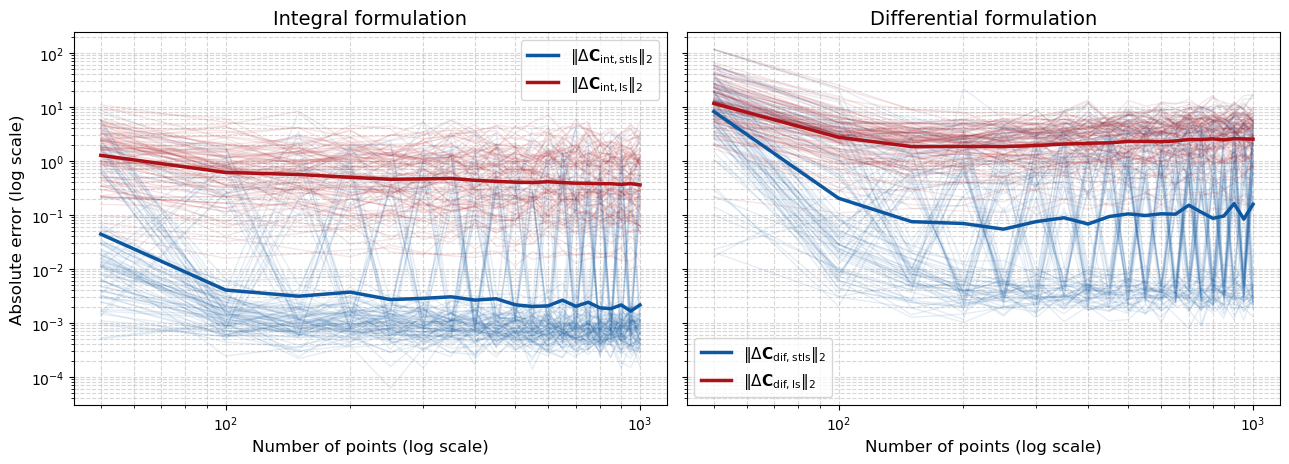

In [12]:
import matplotlib.pyplot as plt

# Prepare figure
fig, axs = plt.subplots(1, 2, figsize=(13, 5), sharex=True, sharey=True)

# Style settings 
alpha_individual = 0.1
lw_individual = 1
alpha_avg = 1.0
lw_avg = 2.5

blues = [plt.cm.Blues(i) for i in [0.4, 0.65, 0.85]]   # [dense, sparse, bound]
reds = [plt.cm.Reds(i) for i in [0.4, 0.65, 0.85]]     # [dense, sparse, bound]

# Left plot: Integral 
ax = axs[0]
for err in ERR_C_int_stls_all:
    ax.loglog(NPTS, err, color=blues[2], alpha=alpha_individual, linewidth=lw_individual)
for err in ERR_C_int_ls_all:
    ax.loglog(NPTS, err, color=reds[2], alpha=alpha_individual, linewidth=lw_individual)

# Averages
ax.loglog(NPTS, avg_ERR_C_int_stls, color=blues[2], alpha=alpha_avg, linewidth=lw_avg,
          label=r"$\| \Delta \mathbf{C}_{\mathrm{int},\mathrm{stls}} \|_{2}$")
ax.loglog(NPTS, avg_ERR_C_int_ls, color=reds[2], alpha=alpha_avg, linewidth=lw_avg,
          label=r"$\| \Delta \mathbf{C}_{\mathrm{int},\mathrm{ls}} \|_{2}$")

if noise == 'off':
# Decay lines
    int_decay = (NPTS ** -3.5) / (1 - NPTS**-3.5)**2
    int_decay *= 10e2
    fit_decay_int = NPTS ** -4.5 * 15e2
    ax.loglog(NPTS, int_decay, 'k:', alpha=alpha_avg, linewidth=lw_avg, label=r"$\mathcal{O}(n^{-3.5})$")
    ax.loglog(NPTS, fit_decay_int, 'k--', alpha=alpha_avg, linewidth=lw_avg, label=r"$\mathcal{O}(n^{-4.5})$")

ax.set_title("Integral formulation", fontsize=14)
ax.set_xlabel("Number of points (log scale)", fontsize=12)
ax.set_ylabel("Absolute error (log scale)", fontsize=12)
#ax.set_ylim(10**-3, 10**2)
ax.grid(True, which='both', linestyle='--', alpha=0.5)
ax.legend(fontsize=11)

# Right plot: Differential
ax = axs[1]
for err in ERR_C_dif_stls_all:
    ax.loglog(NPTS, err, color=blues[2], alpha=alpha_individual, linewidth=lw_individual)
for err in ERR_C_dif_ls_all:
    ax.loglog(NPTS, err, color=reds[2], alpha=alpha_individual, linewidth=lw_individual)

# Averages
ax.loglog(NPTS, avg_ERR_C_dif_stls, color=blues[2], alpha=alpha_avg, linewidth=lw_avg,
          label=r"$\| \Delta \mathbf{C}_{\mathrm{dif},\mathrm{stls}} \|_{2}$")
ax.loglog(NPTS, avg_ERR_C_dif_ls, color=reds[2], alpha=alpha_avg, linewidth=lw_avg,
          label=r"$\| \Delta \mathbf{C}_{\mathrm{dif},\mathrm{ls}} \|_{2}$")

if noise == 'off':
    # Decay lines
    dif_decay = NPTS ** -2.5 * 10e2
    fit_decay_dif = NPTS ** -4.0 * 10e3
    ax.loglog(NPTS, dif_decay, 'k:', alpha=alpha_avg, linewidth=lw_avg, label=r"$\mathcal{O}(n^{-2.5})$")
    ax.loglog(NPTS, fit_decay_dif, 'k--', alpha=alpha_avg, linewidth=lw_avg, label=r"$\mathcal{O}(n^{-4.0})$")

ax.set_title("Differential formulation", fontsize=14)
ax.set_xlabel("Number of points (log scale)", fontsize=12)
ax.grid(True, which='both', linestyle='--', alpha=0.5)
ax.legend(fontsize=11)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plot_save = f"{parent_dir}_{run_dir}_samples-{samples}.pdf"
if noise == "on":
    plot_save = f"{parent_dir}_{run_dir}_samples-{samples}_noisy.pdf"
savefig_path = os.path.join(parent_dir, plot_save)
plt.savefig(savefig_path, bbox_inches='tight')
plt.show()